# 4.데이터 탐색 이해와 실무
### 4.3 다변량 비시각화

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 실습활용을 위한 보스턴 주택가격 데이터 로딩
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    data = load_boston()

### 데이터 컬럼 설명
#### 보스턴 인근 Town 별 주택 가격 및 관련 정보 데이터셋

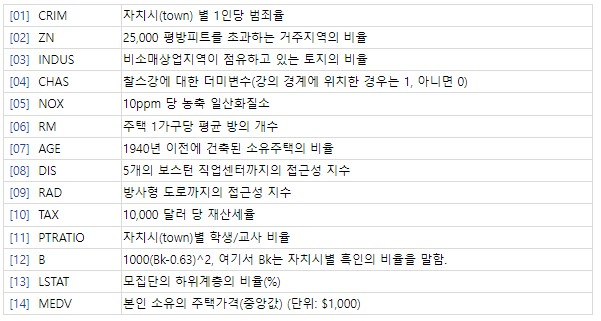

In [3]:
from IPython.display import Image
Image("C:/Users/qctum/boston_columns.jpg")

### 범주형-범주형 다변량 비시각화

#### 교차표(Cross Tabulation)
 * 범주형-범주형 변수를 교차하여 파악함으로써 각 범주 조합 간의 구성을 도출
 * 조합 간의 구성을 통해 범주형 변수 간 관련성을 확인

In [7]:
# 데이터프레임 생성 및 Merge
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['MEDV'])

housing = pd.merge(X, y, left_index=True, right_index=True, how='inner')

# 데이터 copy
housing_data = housing.copy()

In [8]:
# 활용 데이터 확인
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# 데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})

In [11]:
# 타겟변수인 주택가격 (MEDV) 범주화
# 평균 가격 기반으로 고가, 저가 범주로 구분

medv_bins = [0
            , np.mean(housing_data['MEDV'])
            , np.max(housing_data['MEDV'])]
medv_names = ['cheap','expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'], medv_bins, labels=medv_names)
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_G
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,expensive
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,cheap
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,cheap
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,cheap
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,expensive
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,cheap


In [12]:
# 주택가격과 범주화된 독립변수 간 관계 확인
# 1) CHAS 변수와의 관계
rst_CHAS = pd.crosstab(housing_data['CHAS'], housing_data['MEDV_G'], margins = True)
rst_CHAS

MEDV_G,cheap,expensive,All
CHAS,,,
0.0,282,189,471
1.0,15,20,35
All,297,209,506


 * 대부분의 타운이 강 경계에 위치하지 않음

In [14]:
# 관측 범위를 평균을 기준으로 구간화
# IDUS 변수 범주화
# IDUS_LOW: 비소매 사업 지역 비율이 낮음 -> 소매 사업 지역 토지 비율이 많음
# IDUS_LOW: 비소매 사업 지역 비율이 높음 -> 소매 사업 지역 토지 비율이 적음
indus_bins = [0
            , np.mean(housing_data['INDUS'])
            , np.max(housing_data['INDUS'])]
indus_names = ['INDUS_LOW','INDUS_HIGH']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'], indus_bins, labels=indus_names)
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_G,INDUS_G
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,expensive,INDUS_LOW
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,cheap,INDUS_LOW
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive,INDUS_LOW
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,expensive,INDUS_LOW
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,expensive,INDUS_LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,cheap,INDUS_HIGH
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,cheap,INDUS_HIGH
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,expensive,INDUS_HIGH
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,cheap,INDUS_HIGH


In [16]:
# 주택가격과 범주화된 독립변수 간 관계 확인
# 1) INDUS_G 변수와의 괸계
rst_INDUS = pd.crosstab(housing_data['INDUS_G'], housing_data['MEDV_G'], margins = True)

# 행별 범주 구성 비율 확인
# crosstab에서 'normalize=index'로 행별 비율 환산 가능
rst_INDUS['ratio_cheap'] = np.round((rst_INDUS['cheap']/rst_INDUS['All'])*100, 2)
rst_INDUS['ratio_expensive'] = np.round((rst_INDUS['expensive']/rst_INDUS['All'])*100, 2)
rst_INDUS

MEDV_G,cheap,expensive,All,ratio_cheap,ratio_expensive
INDUS_G,,,,,
INDUS_LOW,126,168,294,42.86,57.14
INDUS_HIGH,171,41,212,80.66,19.34
All,297,209,506,58.70,41.30


 * 비소매 사업지역 비율이 평균 대비 높을수록 (INDUS_HIGH), 주택가격이 전체 평균 대비 낮은 지역이 많음
 * 비소매 사업지역 비율이 평균 대비 낮은 경우 (INDUS_LOW), 비등한 관계를 보임

In [17]:
# 관측 범위를 평균을 기준으로 구간화
# RAD 변수 범주화
# RAD_LOW: 고속도로의 접근성 지수가 낮음
# RAD_HIGH: 고속도로의 접근성 지수가 높음
rad_bins = [0
            , np.mean(housing_data['RAD'])
            , np.max(housing_data['RAD'])]
rad_names = ['RAD_LOW','RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'], rad_bins, labels=rad_names)

# 주택가격과 범주화된 독립변수 간 관계 확인
# 2) RAD_G 변수와의 관계
rst_RAD = pd.crosstab(housing_data['RAD_G'], housing_data['MEDV_G'], margins = True)

# 행별 범주 구성 비율 확인
# crosstab에서 'normalize=index'로 행별 비율 환산 가능
rst_RAD['ratio_cheap'] = np.round((rst_RAD['cheap']/rst_RAD['All'])*100, 2)
rst_RAD['ratio_expensive'] = np.round((rst_RAD['expensive']/rst_RAD['All'])*100, 2)
rst_RAD

MEDV_G,cheap,expensive,All,ratio_cheap,ratio_expensive
RAD_G,,,,,
RAD_LOW,183,191,374,48.93,51.07
RAD_HIGH,114,18,132,86.36,13.64
All,297,209,506,58.70,41.30


 * 방사형 고속도로까지 접근성 지수가 높은 경우(RAD_HIGH), 주택가격이 전체 평균 대비 낮은 지역이 많음
 * 방사형 고속도로까지 접근성 지수가 평균 대비 낮은 경우에는(RAD_LOW) 비등한 관계를 보임

In [18]:
# INDUS_G 및 RM_G를 교차하여 MEDV_G 구성 확인
rst_df = pd.crosstab([housing_data['RAD_G'], housing_data['INDUS_G']], housing_data['MEDV_G'],
                    margins=True)
rst_df['ratio_cheap'] = np.round((rst_df['cheap']/rst_df['All'])*100, 2)
rst_df['ratio_expensive'] = np.round((rst_df['expensive']/rst_df['All'])*100, 2)
rst_df

MEDV_G               cheap  expensive  All  ratio_cheap  ratio_expensive
RAD_G    INDUS_G                                                        
RAD_LOW  INDUS_LOW     126        168  294        42.86            57.14
         INDUS_HIGH     57         23   80        71.25            28.75
RAD_HIGH INDUS_HIGH    114         18  132        86.36            13.64
All                    297        209  506        58.70            41.30

 * 기존 개별 변수 결과
    * INDUS_G 와 RAD_G 가 모두 전체 평균 대비 낮은 경우(LOW 레벨) 주택 가격 범주 구분이 두드러지지 않음
 * 함께 교차하여 비교했을 시 개별 컬럼 별 비율 구성보다 조금 더 구분되어짐을 보임(RAD_G='RAD_LOW' and INDUS_G='INDUS_HIGH')
    * 고속도로 접근성 지수는 낮으나, 상업지역이 적은 경우 비교적 주택 가격이 평균대비 낮은 편
 * 다만, INDUS_G와 RAD_G 모두 LOW 레벨일 때(전체 평균보다 낮은) 주택 가격 범주 구분이 두드러지지 않음
 * 범주형으로 변환하여 분석에 활용할 경우, 조금 더 세밀하게 범주 범위 조정 고려 필요

In [19]:
# 관측 범위를 동일한 길이로 구간화
# 3) INDUS 변수 범주 범위 재조정
re_indus_bins = [0
            , np.max(housing_data['INDUS'])/4*1
            , np.max(housing_data['INDUS'])/4*2
            , np.max(housing_data['INDUS'])/4*3
            , np.max(housing_data['INDUS'])]
re_indus_names = ['INDUS_G1', 'INDUS_G2', 'INDUS_G3', 'INDUS_G4']
housing_data['RE_INDUS_G'] = pd.cut(housing_data['INDUS'], re_indus_bins, labels=re_indus_names)

# 주택가격과 범주화된 독립변수 간 관계 확인
# 3) RE_INDUS_G 변수와의 관계
rst_RE_INDUS = pd.crosstab(housing_data['RE_INDUS_G'], housing_data['MEDV_G'], margins = True)

# 행별 범주 구성 비율 확인
rst_RE_INDUS['ratio_cheap'] = np.round((rst_RE_INDUS['cheap']/rst_RE_INDUS['All'])*100, 2)
rst_RE_INDUS['ratio_expensive'] = np.round((rst_RE_INDUS['expensive']/rst_RE_INDUS['All'])*100, 2)
rst_RE_INDUS

MEDV_G,cheap,expensive,All,ratio_cheap,ratio_expensive
RE_INDUS_G,,,,,
INDUS_G1,56,139,195,28.72,71.28
INDUS_G2,79,31,110,71.82,28.18
INDUS_G3,136,38,174,78.16,21.84
INDUS_G4,26,1,27,96.30,3.70
All,297,209,506,58.70,41.30


 * 비소매 사업지역 비율을 재조정한 독립변수(RE_INDUS_G)와 주택가격 범주(MEDV_G)변수와의 관계
 * 각 범주 별 주택가격의 높고 낮음이 비교적 전보다 차이가 두드러짐
 * 비소매 사업지역 비율 정도가 낮을수록 (상업지구가 많을 수록) 주택 가격이 높은 현상을 보임(INDUS_G1 기준)

In [20]:
# RE_INDUS_G 및 RM_G를 교차하여 MEDV_G 구성 확인
# 행별 범주 구성 비율 확인
rst_df = pd.crosstab([housing_data['RAD_G'], housing_data['RE_INDUS_G']], housing_data['MEDV_G'],
                     margins = True)

rst_df['ratio_cheap'] = np.round((rst_df['cheap']/rst_df['All'])*100, 2)
rst_df['ratio_expensive'] = np.round((rst_df['expensive']/rst_df['All'])*100, 2)
rst_df

MEDV_G               cheap  expensive  All  ratio_cheap  ratio_expensive
RAD_G    RE_INDUS_G                                                     
RAD_LOW  INDUS_G1       56        139  195        28.72            71.28
         INDUS_G2       79         31  110        71.82            28.18
         INDUS_G3       22         20   42        52.38            47.62
         INDUS_G4       26          1   27        96.30             3.70
RAD_HIGH INDUS_G3      114         18  132        86.36            13.64
All                    297        209  506        58.70            41.30

 * INDUS 변수 범주 범위를 재조정하여 새로 교차한 결과 변수 별 2개 범주 구분 시 보다(평균 대비), 주택가격 구분이 조금 더 명확
    * RAD_G="RAD_LOW" and RE_INDUS_G="INDUS_G3" 인 경우 제외하고 구분이 조금 더 명확
 * 고속도로 접근성이 낮고, 상업지구가 많을 경우 전체 주택가격의 평균보다 높은 지역이 더 많음
    * RAD_G="RAD_LOW" and INDUS_G="INDUS_G1"
 * 이처럼 범주 범위 조정에 따라 (범주 병합 & 분해) 변수 간 관계 파악 관점을 다양하게 바라볼 수 있고 분석 활용에 고려 가능
 * 기타 활용 방안
    * 범주형 변수 내 범주 간의 조합 관계를 규칙(Rule)으로 생성하여 파생변수 생성 및 분석 모델링 활용

<br><br>

### 범주형-연속형 다변량 비시각화
#### 범주 별 요약 통계
 * 범주형-연속형 변수를 교차하여 파악함으로써 각 범주 조합 간의 대표 수치 도출
 * 대표적으로 수치 도출을 통해 범주 간 차이 확인

In [22]:
# 주택가격 범주 별 INDUS 변수 집계 (평균 활용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['INDUS'].mean())

,INDUS
MEDV_G,
cheap,13.813266
expensive,7.333349


In [23]:
# 주택가격 범주 별 INDUS 변수 집계 (중앙값 활용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['INDUS'].median())

,INDUS
MEDV_G,
cheap,18.10
expensive,5.86


 * 주택가격이 높은 지역은 Town 내 INDUS 값이 적은 (상업지구 비중이 더 많은) 경향을 보임
 * 주택가격 범주 별 INDUS 변수의 집계량의 차이는 평균값보다, 중앙값이 더 두드러지게 보임

In [24]:
# 주택가격 범주 별 AGE 변수 집계(평균 활용)
# AGE: 1940년 이전에 건축된 주택이 차지하는 비율
pd.DataFrame(housing_data.groupby(['MEDV_G'])['AGE'].mean())

,AGE
MEDV_G,
cheap,79.009764
expensive,53.746411


In [25]:
# 주택가격 범주 별 AGE 변수 집계(중앙값 활용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['AGE'].median())

,AGE
MEDV_G,
cheap,88.6
expensive,52.6


 * 주택가격이 높은 지역은 Town 내 오래된 주택 비율이 더 낮고 비교적 신식 건물이 많은 경향을 보임
 * 주택가격 범주 별 AGE 변수의 집계량의 차이는 평균값보다 중앙값이 더 두드러지게 보임

 * 분석 목적 혹은 분석 환경에 따라 많은 데이터를 기준으로 집계하여 분석 알고리즘에 적용해야 하는 경우가 존재
    * Case. 시계열 데이터를 기준 시점 별 집계하여 분석 알고리즘 적용
        - 공장 내 많은 기기 별 작동 및 환경 이력 데이터가 1일에 한번씩 적재되어짐
        - 일별/기기별로 데이터를 집계하여 고장 예측 분석 모델링에 활용
 * 집계 기준(범주) 및 집계방법(평균, 중앙값 등)에 따라 분석 모델링에 적용할 변수 생성이 달라짐
 * 즉, 집계 기준 별 차이가 두드러지는 집계 방법에 대한 확인과 고려가 필요하며, 범주형-연속형 관계 테이블을 통해 확인 가능함

<br><br>
### 연속형-연속형 다변량 비시각화
#### 상관관계
 * 연속형-연속형 변수의 상관분석을 통해 관계성 정도를 파악
 * 상관계수를 기반으로 연속형 변수 간의 밀접성 파악
<br><br>

 * 상관계수 도출 방안
    * 한 컬럼과 다른 모든 컬럼들의 Correlation (corrwith)
    * 모든 컬럼간의 Correlation (corr)

In [26]:
# 데이터 copy
housing_data = housing.copy()

# 데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})

In [27]:
# 주택 가격과 독립변수 간의 상관관계 확인 : Pearson 상관계수
np.round(housing_data.corrwith(housing_data['MEDV']), 2).sort_values()

C:\Users\qctum\AppData\Local\Temp\ipykernel_25676\3303741381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(housing_data.corrwith(housing_data['MEDV']), 2).sort_values()


LSTAT     -0.74
PTRATIO   -0.51
INDUS     -0.48
TAX       -0.47
NOX       -0.43
CRIM      -0.39
AGE       -0.38
RAD       -0.38
DIS        0.25
B          0.33
ZN         0.36
RM         0.70
MEDV       1.00
dtype: float64

 * RM: 주택 1가구당 평균 방의 개수
 * LSTAT: 하위계층의 비율
 * DIS: 5개의 보스턴 직업센터까지의 접근성 지수
<br><br>
 * RM(0.70) 및 LSTAT(-0.74) 두 가지 컬럼이 주택가격과 연관성이 높음
 * RM은 양의 상관관계를 지님: 방의 개수가 많을수록 주택가격이 높음
 * LSTAT는 음의 상관관계를 지님: 하위 계층 비율이 높을 경우, 주택가격이 낮아짐

In [28]:
# 모든 컬럼 간 상관관계 도출
np.round(housing_data.corr(), 2)

C:\Users\qctum\AppData\Local\Temp\ipykernel_25676\3566530786.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(housing_data.corr(), 2)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
NOX,0.42,-0.52,0.76,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47
PTRATIO,0.29,-0.39,0.38,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,-0.51


강한 상관관계를 지닌 변수 조합 확인
 * TAX-RAD(0.91): 재산세율이 높을수록, 방사형 고속도로까지 접근성 지수가 높음
 * TAX-INDUS(0.72): 재산세율이 높을수록, 비상업지역의 비중이 높음 (상업지역 비중이 떨어짐)
 * AGE-NOX(0.73): 1940년 이전 건축된 주택이 많은 지역일수록, 일산화질소 농도가 높음
 * AGE-DIS(-0.75): 1940년 이전 건축된 주택이 많은 지역일수록, 직업센터까지 접근성 지수가 떨어짐
 * DIS-NOX(-0.77): 직업센터까지 접근성 지수가 떨어질수록, 일산화질소 농도 높음
 * NOX-INDUS(0.76): 일산화질소 농도가 높을 수록 비상업지역의 비중이 높음(상업지역 비중이 떨어짐)

In [30]:
# 상관계수 유의성 결정
import scipy.stats as stats
stats.pearsonr(housing_data.TAX, housing_data.RAD)

PearsonRResult(statistic=0.9102281885331868, pvalue=4.129920119404221e-195)

 * TAX-RAD 의 관계는 매우 강한 상관관계를 보이며, 만일 회귀(Regression) 분석 알고리즘을 활용할 경우 다중공선성 문제에 직면함
 * 위 사항을 해결하기 위한 방안
    * 논리적으로 적합한 변수를 선택 혹은 종속변수와 관계성을 더 보이는 변수 선택(TAX-MEDV:-0.47/RAD-MEDV:-0.38)
    * 위 변수를 대상으로 PCA를 수행하는 등 새로운 특징을 생성하는 방안 고려 가능

<br>

* 위처럼 모든 상관관계를 파악하는 경우 컬럼이 많아질수록 파악이 어려움
     * 시각화의 필요성 존재!